# Multiple Linear Regression

For conducting multiple linear regression through the least squares method in Python, you can leverage the `ModelSpec()` function from suitable libraries like `statsmodels` or `scikit-learn`. This function aids in crafting the model matrix and response variables crucial for regression analysis. In the present illustration, we'll delve into a multiple linear regression model incorporating two predictor variables: `lstat` and `age` {cite:p}`james2023introduction`.

## Example: Boston House-Price Data

The Boston House-Price Data can be revisited for the purpose of multiple linear regression analysis.

For our purposes, we will focus exclusively on three variables: `AGE`, `LSTAT`, and `MEDV`.


| Variable |                               Description                               |
|:--------:|:-----------------------------------------------------------------------:|
|    AGE   |          proportion of owner-occupied units built prior to 1940         |
|   LSTAT  |                     \% lower status of the population                   |
|   MEDV   |             Median value of owner-occupied homes in \$1000's            |

In [1]:
# Recall Boston Dataset
import numpy as np
import pandas as pd
import statsmodels.api as sm

_url = "http://lib.stat.cmu.edu/datasets/boston"
columns = 6 *['_'] + ['AGE'] + 5 *['_'] + ['LSTAT', 'MEDV']

Boston = pd.read_csv(filepath_or_buffer= _url, delim_whitespace=True, skiprows=21,
                 header=None)

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = Boston.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
Boston = pd.DataFrame(data = all_values.reshape(-1, len(columns)),
                  columns = columns)
Boston = Boston.drop(columns=['_'])
display(Boston)

,AGE,LSTAT,MEDV
0,65.2,4.98,24.0
1,78.9,9.14,21.6
2,61.1,4.03,34.7
3,45.8,2.94,33.4
4,54.2,5.33,36.2
...,...,...,...
501,69.1,9.67,22.4
502,76.7,9.08,20.6
503,91.0,5.64,23.9
504,89.3,6.48,22.0


The steps for conducting this analysis utilizing the `statsmodels` library are elucidated as follows {cite:p}`seabold2010statsmodels`:

**Regression model**: $\text{MEDV} = \beta_0 + \beta_1 \cdot \text{LSTAT}  + \beta_2 \cdot \text{AGE} $.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Also recall our Reg_Result for OLS Reression results
def Reg_Result(Inp):
    Temp = pd.read_html(Inp.summary().tables[1].as_html(), header=0, index_col=0)[0]
    display(Temp.style\
    .format({'coef': '{:.4e}', 'P>|t|': '{:.4e}', 'std err': '{:.4e}'})\
    .bar(subset=['coef'], align='mid', color='Lime')\
    .set_properties(subset=['std err'], **{'background-color': 'DimGray', 'color': 'White'}))

# Step 1: Prepare the predictor variables and target variable
X = Boston[['LSTAT', 'AGE']]  # Predictor variables
y = Boston['MEDV']          # Target variable

# Step 2: Add a constant term to the predictor variables (intercept)
X = sm.add_constant(X)

# Step 3: Fit the multiple linear regression model using ordinary least squares (OLS)
model = sm.OLS(y, X)
Results = model.fit()

# Step 4: Print the summary of the regression results
print(Results.summary())
Reg_Result(Results)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.98e-88
Time:                        08:45:30   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

,coef,std err,t,P>|t|,[0.025,0.975]
const,3.3223e+01,7.3100e-01,45.458000,0.0000e+00,31.787000,34.659000
LSTAT,-1.0321e+00,4.8000e-02,-21.416000,0.0000e+00,-1.127000,-0.937000
AGE,3.4500e-02,1.2000e-02,2.826000,5.0000e-03,0.011000,0.059000


The output is a summary of the results from an Ordinary Least Squares (OLS) regression analysis. This analysis aims to model the relationship between the dependent variable (`MEDV`, in this case) and two independent variables (`LSTAT` and `AGE`).

Let's break down the different components of the summary:

1. Dependent Variable: `MEDV`
   The dependent variable is the target variable in the regression analysis. It represents the variable we are trying to predict or explain.

2. R-squared: 0.551
   The R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is explained by the independent variables. In this case, the R-squared is 0.551, indicating that approximately 55.1% of the variance in `MEDV` can be explained by the predictor variables `LSTAT` and `AGE`.

3. Model: OLS
   The model used for the regression analysis is the Ordinary Least Squares (OLS) model, which is a common method for estimating the coefficients of a linear regression model.

4. Adj. R-squared: 0.549
   The adjusted R-squared adjusts the R-squared value for the number of predictor variables in the model. It penalizes the R-squared for including unnecessary predictors and provides a more appropriate measure of the model's goodness of fit. In this case, the adjusted R-squared is 0.549.

5. Method: Least Squares
   The method used to estimate the regression coefficients is the method of least squares, which minimizes the sum of the squared differences between the observed and predicted values.

6. F-statistic: 309.0
   The F-statistic is a measure of the overall significance of the regression model. It assesses whether the model as a whole is statistically significant in explaining the variance in the dependent variable. In this case, the F-statistic is 309.0, and the associated probability (Prob (F-statistic)) is very low (2.98e-88), indicating that the model is statistically significant.

7. Date, Time, No. Observations, Df Residuals, Df Model, Covariance Type
   These are additional information about the analysis, including the date and time of the analysis, the number of observations (506), the degrees of freedom for the residuals (503), the degrees of freedom for the model (2), and the covariance type (nonrobust).

8. Coefficients and Associated Statistics:
   The table displays the estimated coefficients for the intercept (`const`) and the predictor variables (`LSTAT` and `AGE`). For each coefficient, the summary provides its estimated value (`coef`), standard error (`std err`), t-statistic (`t`), probability (P>|t|), and the 95% confidence interval (`[0.025 0.975]`). The t-statistic assesses the significance of each coefficient, and the associated probability (P>|t|) is a two-tailed test p-value. If the p-value is small (typically less than 0.05), the coefficient is considered statistically significant.

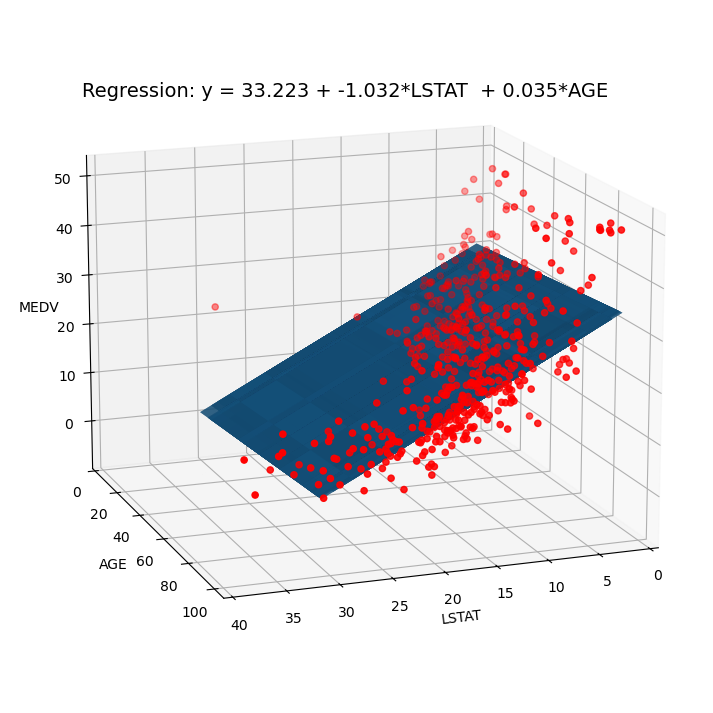

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_regression_surface(params, Boston):
    Radio = np.arange(0, 50)
    TV = np.arange(0, 300)
    X1, X2 = np.meshgrid(Boston['LSTAT'].values, Boston['AGE'].values, indexing='xy')
    Z = params['const'] + X1 * params['LSTAT'] + X2 * params['AGE']
    return X1, X2, Z

def plot_3d(Results, Boston):
    params = Results.params
    X1, X2, Z = generate_regression_surface(params, Boston)
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, projection='3d')
    bet0, bet1, bet2 = params['const'], params['LSTAT'], params['AGE']
    txt = f'Regression: y = {bet0:.3f} + {bet1:.3f}*LSTAT  + {bet2:.3f}*AGE'
    fig.suptitle(txt, fontsize=14, y = 0.8)

    ax.plot_surface(X1, X2, Z, rstride=10, cstride=5, alpha=0.4)

    # Customize this part if you have the original data points
    ax.scatter3D(Boston['LSTAT'].values, Boston['AGE'].values, Boston['MEDV'].values, c='r')
    ax.set_xlabel('LSTAT')
    ax.set_xlim([0, 40])
    ax.set_ylabel('AGE')
    ax.set_ylim(ymin=0)
    ax.set_zlabel('MEDV')

    ax.view_init(elev=15, azim= 70)

    plt.show()

plot_3d(Results, Boston)

<!-- ## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_regression_surface(params, Boston):
    Radio = np.arange(0, 50)
    TV = np.arange(0, 300)
    X1, X2 = np.meshgrid(Boston['LSTAT'].values, Boston['AGE'].values, indexing='xy')
    Z = params['const'] + X1 * params['LSTAT'] + X2 * params['AGE']
    return X1, X2, Z

def plot_3d(Results, Boston):
    params = Results.params
    X1, X2, Z = generate_regression_surface(params, Boston)
    bet0, bet1, bet2 = params['const'], params['LSTAT'], params['AGE']
    txt = f'Regression: y = {bet0:.3f} + {bet1:.3f}*LSTAT  + {bet2:.3f}*AGE'
    
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x= Boston['LSTAT'],
                               y= Boston['AGE'],
                               z= Boston['MEDV'],
                               mode='markers', marker=dict(size=4, color= Boston.MEDV, colorscale='Reds', opacity=0.8)))
    fig.add_trace(go.Surface(z=Z, x=X1, y=X2, colorscale='Blues', colorbar_len=0.6))
    fig.update_layout(height = 550, title={'text': '<b>' + txt + '<b>',
                                       'x':.5, 'y': .85, 'xanchor': 'center', 'yanchor': 'top'},
                  scene = dict(xaxis = dict(range=[0, 50], title = 'LSTAT'),
                               yaxis = dict(range=[0, 110], title = 'AGE'),
                               zaxis = dict(range=[0, 60], title = "MEDV")))
    fig.show()

plot_3d(Results, Boston) -->

## Example: Auto MPG dataset

<font color='Blue'><b>Example:</b></font>
In this example, we focus on the Auto MPG dataset, which is sourced from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/9/auto+mpg). Our objective is to showcase the application of multivariable linear regression using this dataset.

In [4]:
import pandas as pd
# You can download the dataset from: http://archive.ics.uci.edu/static/public/9/auto+mpg.zip

# Define column names based on the dataset's description
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model_Year', 'Origin', 'Car_Name']

# Read the dataset with column names, treating '?' as missing values, and remove rows with missing values
auto_mpg_df = pd.read_csv('auto-mpg.data', names=column_names,
                          na_values='?', delim_whitespace=True).dropna()

# Display the resulting DataFrame
display(auto_mpg_df)

# Print the data types of columns in the DataFrame
display(auto_mpg_df.dtypes.to_frame('dtype'))

# Remove the 'Car_Name' column from the DataFrame
auto_mpg_df = auto_mpg_df.drop(columns=['Car_Name'])

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


,dtype
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,float64
Acceleration,float64
Model_Year,int64
Origin,int64
Car_Name,object


1. **MPG (Miles per Gallon):** This column represents the fuel efficiency of the vehicle in miles per gallon. It indicates how many miles the vehicle can travel on one gallon of fuel. Higher MPG values signify better fuel efficiency.

2. **Cylinders:** This column shows the number of cylinders in the engine. It is a measure of the engine's capacity and power. Common values are 4, 6, and 8 cylinders, indicating four-cylinder, six-cylinder, and eight-cylinder engines, respectively.

3. **Displacement:** Displacement refers to the engine's total volume, typically measured in cubic inches (or cubic centimeters). It's an indicator of the engine's size and power. A higher displacement often correlates with more power.

4. **Horsepower:** This column indicates the engine's horsepower, which is a measure of the engine's ability to perform work. Higher horsepower values usually mean a more powerful engine.

5. **Weight:** Weight represents the vehicle's mass, often in pounds or kilograms. It's an important factor in fuel efficiency because lighter vehicles tend to have better MPG.

6. **Acceleration:** This column shows the vehicle's acceleration performance, typically measured in seconds to reach 60 miles per hour (or 100 kilometers per hour) from a standstill. Faster acceleration is often associated with sportier or high-performance vehicles.

7. **Model Year:** This column specifies the year in which the vehicle model was manufactured. It can be used to track trends in fuel efficiency and technology over time.

8. **Origin:** Origin typically refers to the country of origin or manufacturing of the vehicle. It's often a categorical variable, and values may represent different countries or regions where the vehicle was produced.

9. **Car Name:** This column provides the name or model of the car. It can be used for identification and categorization of different car models.

### Linear Regression using statsmodels API

In the following example, we utilize the formula feature of the statsmodels API.

`````{admonition} Remark
:class: important

The formula feature in the statsmodels library is a powerful tool for specifying linear models in a concise and intuitive manner. It allows you to define the relationship between variables using a formula-like syntax, which closely resembles how you might write mathematical equations. This feature is particularly useful for specifying linear regression models and other types of statistical models.

Key aspects of the formula feature include {cite:p}`statsmodelsDocumentation, seabold2010statsmodels`:

1. **Dependent and Independent Variables**: You can easily specify the dependent (target) variable and independent (predictor) variables in your model. For example, in a linear regression model, you can define the dependent variable as a function of one or more independent variables.

2. **Formula Syntax**: The formula syntax typically follows the pattern `Y ~ X1 + X2 + ... + Xn`, where `Y` represents the dependent variable, and `X1`, `X2`, and so on are the independent variables. You can use operators like `+` for addition, `-` for subtraction, and `*` for interaction terms.

3. **Categorical Variables**: Categorical variables and their interactions can be easily included in the model using this syntax. For example, you can use `C(category_variable)` to specify a categorical variable.

4. **Model Types**: While commonly used in linear regression, the formula feature is versatile and can be applied to various types of models supported by statsmodels, including generalized linear models (GLMs), logistic regression, and more.

5. **Automatic Intercept**: By default, statsmodels automatically includes an intercept (constant) term in the model. You can exclude it by using `- 1` in the formula if necessary.

6. **Advanced Features**: The formula feature supports more advanced features like handling missing data and specifying custom contrasts for categorical variables.

`````

In [5]:
import statsmodels.formula.api as smf
Results = smf.ols('MPG ~ Cylinders + Displacement + Horsepower + Weight + Acceleration + Model_Year + C(Origin)',
                  auto_mpg_df).fit()
print(Results.summary())
Reg_Result(Results)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.79e-139
Time:                        08:45:31   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.7955e+01,4.6770e+00,-3.839000,0.0000e+00,-27.150000,-8.759000
C(Origin)[T.2],2.6300e+00,5.6600e-01,4.643000,0.0000e+00,1.516000,3.744000
C(Origin)[T.3],2.8532e+00,5.5300e-01,5.162000,0.0000e+00,1.766000,3.940000
Cylinders,-4.8970e-01,3.2100e-01,-1.524000,1.2800e-01,-1.121000,0.142000
Displacement,2.4000e-02,8.0000e-03,3.133000,2.0000e-03,0.009000,0.039000
Horsepower,-1.8200e-02,1.4000e-02,-1.326000,1.8500e-01,-0.045000,0.009000
Weight,-6.7000e-03,1.0000e-03,-10.243000,0.0000e+00,-0.008000,-0.005000
Acceleration,7.9100e-02,9.8000e-02,0.805000,4.2100e-01,-0.114000,0.272000
Model_Year,7.7700e-01,5.2000e-02,15.005000,0.0000e+00,0.675000,0.879000


`````{admonition} Note
:class: warning

In the context of linear regression modeling using the `smf.ols` function from the Statsmodels library, the notation `C(label)` is used to indicate the treatment of a categorical variable with the specified label as a categorical or factor variable. This notation is relevant when dealing with predictor variables of a categorical nature, such as "Origin," that are being included in the linear regression analysis.

`````

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('../mystyle.mplstyle')

def _MyCountPlot(col, data, xlim = [0, 300], grid=False):
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, len(data[col].unique()) - 1 ))

    # Create a count plot with a specified color palette
    _ = sns.countplot(y= data[col], ax=ax, edgecolor='black', palette = 'pastel')

    # Set labels and title
    _ = ax.set(xlabel=col, ylabel='Count', title='Countplot for %s category' % col)

    # Add count values on top of each bar
    for p in ax.patches:
        _ = ax.annotate(f'{p.get_width():.0f}',
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center', color='black', xytext=(5, 0),
                        textcoords='offset points')

    # Limit x-axis range
    ax.set(xlim=xlim)

    # Add grid lines only if 'grid' is True
    if grid:
        ax.yaxis.grid(True, linestyle='--', alpha=0.7)

To determine the number of vehicles in the Auto MPG dataset by their country of origin, you can group the data by the 'Origin' column and then count the number of occurrences for each origin.


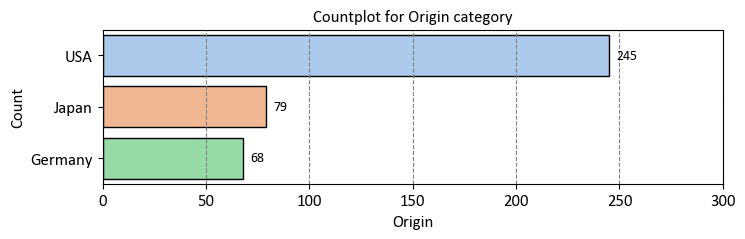

In [7]:
_MyCountPlot(col='Origin', data = auto_mpg_df[['Origin']].replace({1: 'USA', 2: 'Germany', 3: 'Japan'}))

### Linear Regression using the scikit-learn API

We aim to apply linear regression while making use of both the training and test sets.

```{admonition} Note
:class: warning

For a comprehensive understanding of train and test sets, please refer to the "Prologue: Statistical Metrics and Evaluation" section.
```

`````{admonition} Remark
:class: important

The concepts of training and test datasets are fundamental in machine learning and are used to evaluate and validate the performance of predictive models. Here's an explanation of each:

1. **Training Dataset**:
   The training dataset is a subset of the original data that is used to train or build a machine-learning model. It contains both the input features (also known as predictors or independent variables) and their corresponding known output or target values. The model "learns" from this dataset by adjusting its internal parameters to capture the relationships between the input features and the target values. The training process involves feeding the model a variety of examples to enable it to generalize patterns and make accurate predictions on new, unseen data.

2. **Test Dataset**:
   The test dataset is a separate subset of the original data that is not used during the training phase. It is employed to evaluate the model's performance after it has been trained. The test dataset also includes input features and their corresponding known target values, but the target values are kept hidden from the model during evaluation. The model uses its learned parameters to predict the target values based on the input features from the test dataset. The predicted values are then compared with the actual target values to assess the model's accuracy and ability to generalize to new, unseen data.

The purpose of splitting the data into training and test datasets is to simulate the model's performance in real-world scenarios. The model's success on the test dataset reflects its ability to make accurate predictions on new, previously unseen data, which is a key goal in machine learning. It helps to prevent overfitting, where a model becomes too specialized to the training data and performs poorly on new data, by providing an independent evaluation of its performance.

In some cases, a third subset called the "validation dataset" is also used. This dataset is used during model development to fine-tune hyperparameters and make decisions about model selection and feature engineering. The validation dataset aids in preventing "data leakage" where the model's performance becomes overly optimistic due to tuning on the test data.

The division between training and test datasets is typically done randomly to ensure that the datasets are representative of the overall data distribution. Techniques like cross-validation can be used to further assess model performance and robustness.

`````

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load your data into the 'auto_mpg_df' DataFrame.

# 1. Converting data into dependent and independent variables
X = auto_mpg_df.drop('MPG', axis=1)
y = auto_mpg_df['MPG']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

# 3. Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 4. Evaluate the model on the training dataset
y_train_pred = regressor.predict(X_train)

# Calculate training performance metrics
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error (MSE): {mse_train:.3f}')
print(f'Training R-squared (R2): {r2_train:.3f}')

# 5. Evaluate the model on the test dataset
y_test_pred = regressor.predict(X_test)

# Calculate test performance metrics
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error (MSE): {mse_test:.3f}')
print(f'Test R-squared (R2): {r2_test:.3f}')

Shape of X_train = (313, 7)
Shape of y_train = (313,)
Shape of X_test = (79, 7)
Shape of y_test = (79,)
Training Mean Squared Error (MSE): 11.233
Training R-squared (R2): 0.822
Test Mean Squared Error (MSE): 9.630
Test R-squared (R2): 0.804


<!-- 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('../mystyle.mplstyle')

# Create a figure and two subplots with different widths
fig, ax = plt.subplots(2, 1, figsize=(9.5, 7), gridspec_kw={'height_ratios': [1, 4]})

# Plot the boxplot on the first subplot
sns.boxplot(x=auto_mpg_df["Horsepower"], ax=ax[0], color='LawnGreen')
ax[0].set_title("Boxplot for (Potential) Outliers Detection", fontweight="bold", fontsize=14)
ax[0].set_xlabel("Horsepower", fontsize=12)

# Plot the histogram with KDE on the second subplot
sns.histplot(auto_mpg_df["Horsepower"], kde=True, bins=20, color='aqua', ax=ax[1])
ax[1].lines[0].set_color('red')
ax[1].set_title("Distribution Plot for Skewness", fontweight="bold", fontsize=14)
ax[1].set_xlabel("Horsepower", fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

_ = fig.suptitle('Horsepower', weight = 'bold', fontsize =16)
 -->

Correlation measures the linear relationship's strength and direction between two variables. It quantifies the association between changes in one variable and changes in another. The widely used correlation measure is the Pearson correlation coefficient (r), which ranges from -1 to 1. A positive r indicates a positive correlation, signifying that as one variable increases, the other tends to increase. Conversely, a negative r suggests a negative correlation, where as one variable increases, the other tends to decrease. A correlation of 0 denotes no linear relationship.

Multiple linear regression is a statistical technique for analyzing the relationship between a dependent variable and two or more independent variables. It extends linear regression by considering multiple predictors simultaneously. The model assumes a linear relationship between the dependent variable and independent variables, expressed as:

\begin{equation}Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon\end{equation}

Where:
- $Y$ represents the dependent variable.
- $X_1, X_2, ..., X_n$ are the independent variables.
- $\beta_0$ is the intercept (constant).
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients representing the strength and direction of the relationship between each independent variable and the dependent variable.
- $\varepsilon$ represents the error term.

The correlation coefficient ($r$) can serve as an initial tool to assess the relationship between individual independent variables and the dependent variable in multiple linear regression. A strong and significant correlation suggests a potential candidate for inclusion in the regression model. However, correlation alone doesn't offer a comprehensive understanding in a multivariate context. Multiple linear regression enables the consideration of combined influences of multiple independent variables on the dependent variable, accounting for potential interactions.

In [9]:
df_corr = auto_mpg_df.corr()
display(df_corr.style.background_gradient(cmap='RdYlGn', vmin= -1, vmax=1).format(precision=4))

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
MPG,1.0000,-0.7776,-0.8051,-0.7784,-0.8322,0.4233,0.5805,0.5652
Cylinders,-0.7776,1.0000,0.9508,0.8430,0.8975,-0.5047,-0.3456,-0.5689
Displacement,-0.8051,0.9508,1.0000,0.8973,0.9330,-0.5438,-0.3699,-0.6145
Horsepower,-0.7784,0.8430,0.8973,1.0000,0.8645,-0.6892,-0.4164,-0.4552
Weight,-0.8322,0.8975,0.9330,0.8645,1.0000,-0.4168,-0.3091,-0.5850
Acceleration,0.4233,-0.5047,-0.5438,-0.6892,-0.4168,1.0000,0.2903,0.2127
Model_Year,0.5805,-0.3456,-0.3699,-0.4164,-0.3091,0.2903,1.0000,0.1815
Origin,0.5652,-0.5689,-0.6145,-0.4552,-0.5850,0.2127,0.1815,1.0000


In [10]:
df_combined = pd.concat([df_corr.MPG[1:].to_frame('Correlation'),
                         pd.DataFrame({'Coefficient':regressor.coef_}, index = X_train.columns)], axis = 1)
display(df_combined.style.background_gradient(cmap='RdYlGn', vmin= -1, vmax= 1, axis= None).format(precision=4))

,Correlation,Coefficient
Cylinders,-0.7776,-0.2926
Displacement,-0.8051,0.0184
Horsepower,-0.7784,-0.0256
Weight,-0.8322,-0.0062
Acceleration,0.4233,0.0861
Model_Year,0.5805,0.7615
Origin,0.5652,1.5638


We can see that:

1. **Sign of Coefficients**: If the correlation coefficient for a variable is negative, it means there's a negative linear relationship between that variable and MPG (as the variable increases, MPG tends to decrease). In this case, you would expect the linear regression coefficient for that variable to be negative as well, indicating that, when controlling for other variables, an increase in that variable results in a decrease in MPG.

2. **Magnitude of Coefficients**: The correlation coefficient gives you the strength of the linear relationship between the variable and MPG, **but it doesn't take into account the influence of other variables**. In contrast, the linear regression coefficient considers the impact of that variable while controlling for other variables in the model. So, if the magnitude of the regression coefficient is larger, it indicates that the variable has a stronger independent effect on MPG, even after accounting for the other variables.

3. **Direction of Relationship**: Both coefficients provide information about the direction of the relationship. A negative correlation coefficient and a negative regression coefficient both indicate a negative relationship (as the variable increases, MPG decreases), while positive coefficients indicate a positive relationship.

<font color='Blue'><b>Example:</b></font> In this example, we modify the modeling process by taking the natural logarithm of the dependent variable, MPG, before training the linear regression model. This adjustment can allow us to better capture the non-linear relationships present in the data. 

In [11]:
# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, np.log(y_train))

# Evaluate the model on the training dataset
y_train_pred = regressor.predict(X_train)

# Calculate training performance metrics
mse_train = metrics.mean_squared_error(np.log(y_train), y_train_pred)
r2_train = metrics.r2_score(np.log(y_train), y_train_pred)

print(f'Training Mean Squared Error (MSE): {mse_train:.3f}')
print(f'Training R-squared (R2): {r2_train:.3f}')

# 5Evaluate the model on the test dataset
y_test_pred = regressor.predict(X_test)

# Calculate test performance metrics
mse_test = metrics.mean_squared_error(np.log(y_test), y_test_pred)
r2_test = metrics.r2_score(np.log(y_test), y_test_pred)

print(f'Test Mean Squared Error (MSE): {mse_test:.3f}')
print(f'Test R-squared (R2): {r2_test:.3f}')

Training Mean Squared Error (MSE): 0.014
Training R-squared (R2): 0.882
Test Mean Squared Error (MSE): 0.014
Test R-squared (R2): 0.860


The previous model had training and test Mean Squared Error (MSE) values of 11.233 and 9.630, respectively, along with R-squared ($R^2$) values of 0.822 and 0.804. However, after applying the logarithmic transformation to MPG, the model's performance improved significantly. The training and test MSE reduced to 0.014, and the $R^2$ values increased to 0.882 for training and 0.860 for the test dataset. These results demonstrate that the logarithmic transformation of the dependent variable enhanced the model's accuracy, making it a more robust predictor of MPG.

In [12]:
auto_mpg_df_ln = auto_mpg_df.copy()
auto_mpg_df_ln['MPG'] = np.log(auto_mpg_df_ln['MPG'])
auto_mpg_df_ln.rename(columns = {'MPG' : 'ln(MPG)'}, inplace = True)
df_corr = auto_mpg_df_ln.corr()
display(df_corr[['ln(MPG)']][1:].style.background_gradient(cmap='RdYlGn', vmin= -1, vmax=1).format(precision=4))

,ln(MPG)
Cylinders,-0.8268
Displacement,-0.8537
Horsepower,-0.8302
Weight,-0.8757
Acceleration,0.4476
Model_Year,0.5773
Origin,0.5605


Let's summarize the differences:

**Original Correlations:**
- Cylinders had a correlation of approximately -0.7776 with MPG.
- Displacement had a correlation of approximately -0.8051 with MPG.
- Horsepower had a correlation of approximately -0.7784 with MPG.
- Weight had a correlation of approximately -0.8322 with MPG.
- Acceleration had a correlation of approximately 0.4233 with MPG.
- Model_Year had a correlation of approximately 0.5805 with MPG.
- Origin had a correlation of approximately 0.5652 with MPG.

**Updated Correlations with ln(MPG):**
- Cylinders has a correlation of approximately -0.8268 with ln(MPG).
- Displacement has a correlation of approximately -0.8537 with ln(MPG).
- Horsepower has a correlation of approximately -0.8302 with ln(MPG).
- Weight has a correlation of approximately -0.8757 with ln(MPG).
- Acceleration has a correlation of approximately 0.4476 with ln(MPG).
- Model_Year has a correlation of approximately 0.5773 with ln(MPG).
- Origin has a correlation of approximately 0.5605 with ln(MPG).

**Comparison:**
- In the original correlations, all variables showed a strong negative linear relationship with MPG, as evidenced by their negative correlation coefficients.
- After transforming the dependent variable to ln(MPG), the correlations remain negative, indicating that as these variables increase, the logarithm of MPG tends to decrease.
- Notably, the magnitude of the correlations increased in the ln(MPG) table, suggesting a slightly stronger linear relationship between these variables and ln(MPG) compared to the original MPG.
- Acceleration, Model_Year, and Origin still show positive correlations with ln(MPG), as they did with the original MPG, but the correlations are stronger after the logarithmic transformation.

Overall, the natural logarithm of MPG appears to have strengthened the linear relationships between these variables.

## Handling Categorical Variables

`pandas.get_dummies` is a function in the Pandas library used for one-hot encoding categorical variables. It transforms categorical data into a binary matrix representation, where each unique category becomes a column with binary values indicating the presence or absence of that category for each observation.

<font color='Blue'><b>Example:</b></font> The categorical variable 'Origin' can be one-hot encoded using `pd.get_dummies`, replacing numerical codes (1, 2, 3) with corresponding country names (USA, Germany, Japan).

In [13]:
auto_mpg_df_mod = auto_mpg_df_ln.copy()
origin_dummies = pd.get_dummies(auto_mpg_df['Origin'].replace({1: 'USA', 2: 'Germany', 3: 'Japan'}), dtype=int)
auto_mpg_df_mod = pd.concat([auto_mpg_df_mod.drop(columns=['Origin']), origin_dummies], axis=1)
del origin_dummies
display(auto_mpg_df_mod)

,ln(MPG),Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Germany,Japan,USA
0,2.890372,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,2.708050,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,2.890372,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,2.772589,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,2.833213,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,3.295837,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,3.784190,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,3.465736,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,3.332205,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load your data into the 'auto_mpg_df' DataFrame.

# 1. Converting data into dependent and independent variables
X = auto_mpg_df_mod.drop('ln(MPG)', axis=1)
y = auto_mpg_df_mod['ln(MPG)']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

# 3. Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 4. Evaluate the model on the training dataset
y_train_pred = regressor.predict(X_train)

# Calculate training performance metrics
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error (MSE): {mse_train:.3f}')
print(f'Training R-squared (R2): {r2_train:.3f}')

# 5. Evaluate the model on the test dataset
y_test_pred = regressor.predict(X_test)

# Calculate test performance metrics
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error (MSE): {mse_test:.3f}')
print(f'Test R-squared (R2): {r2_test:.3f}')

Shape of X_train = (313, 9)
Shape of y_train = (313,)
Shape of X_test = (79, 9)
Shape of y_test = (79,)
Training Mean Squared Error (MSE): 0.014
Training R-squared (R2): 0.885
Test Mean Squared Error (MSE): 0.014
Test R-squared (R2): 0.859
